# Laboratorio #4
## CC 1039466438

### 2.) Analisis de series de tiempo

#### 2.1) Lectura de datos de Tasa de Cambio

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def extract_currency(x):
    if isinstance(x, str):
        return(x.replace('%', '').replace(',', ''))
    return(x)

df = pd.read_csv('historical_TRM.csv', delimiter=',')
#Para analizar su contenido
print(df.head())

        Fecha    Precio  Apertura    Maximo    Minimo  Cambio
0  01/01/2023  4,859.00  4,848.00  5,008.88  4,818.11   0.25%
1  12/25/2022  4,847.00  4,729.00  4,851.90  4,727.21   2.51%
2  12/18/2022  4,728.33  4,790.26  4,790.63  4,727.79  -1.19%
3  12/11/2022  4,785.51  4,809.85  4,861.00  4,757.65  -0.43%
4  12/04/2022  4,806.00  4,771.54  4,843.88  4,765.20   0.78%


In [11]:
tiempo=df['Fecha']
senal_precio=np.array(df['Precio'].apply(extract_currency).astype('float'))
senal_cambio=np.array(df['Cambio'].apply(extract_currency).astype('float'))

#### 2.2) periodo

In [54]:
print("Periodo de la señal por dia: ",len(tiempo)/len(tiempo))

Periodo de la señal por dia:  1.0


In [43]:
print("Periodo de la señal por semana: ",len(senal_precio)/52)

Periodo de la señal por semana:  10.038461538461538


In [44]:
print("Periodo de la señal por año: ",len(senal_precio)/365)

Periodo de la señal por año:  1.4301369863013698


#### 2.3 ) Grafica de la señal Precio

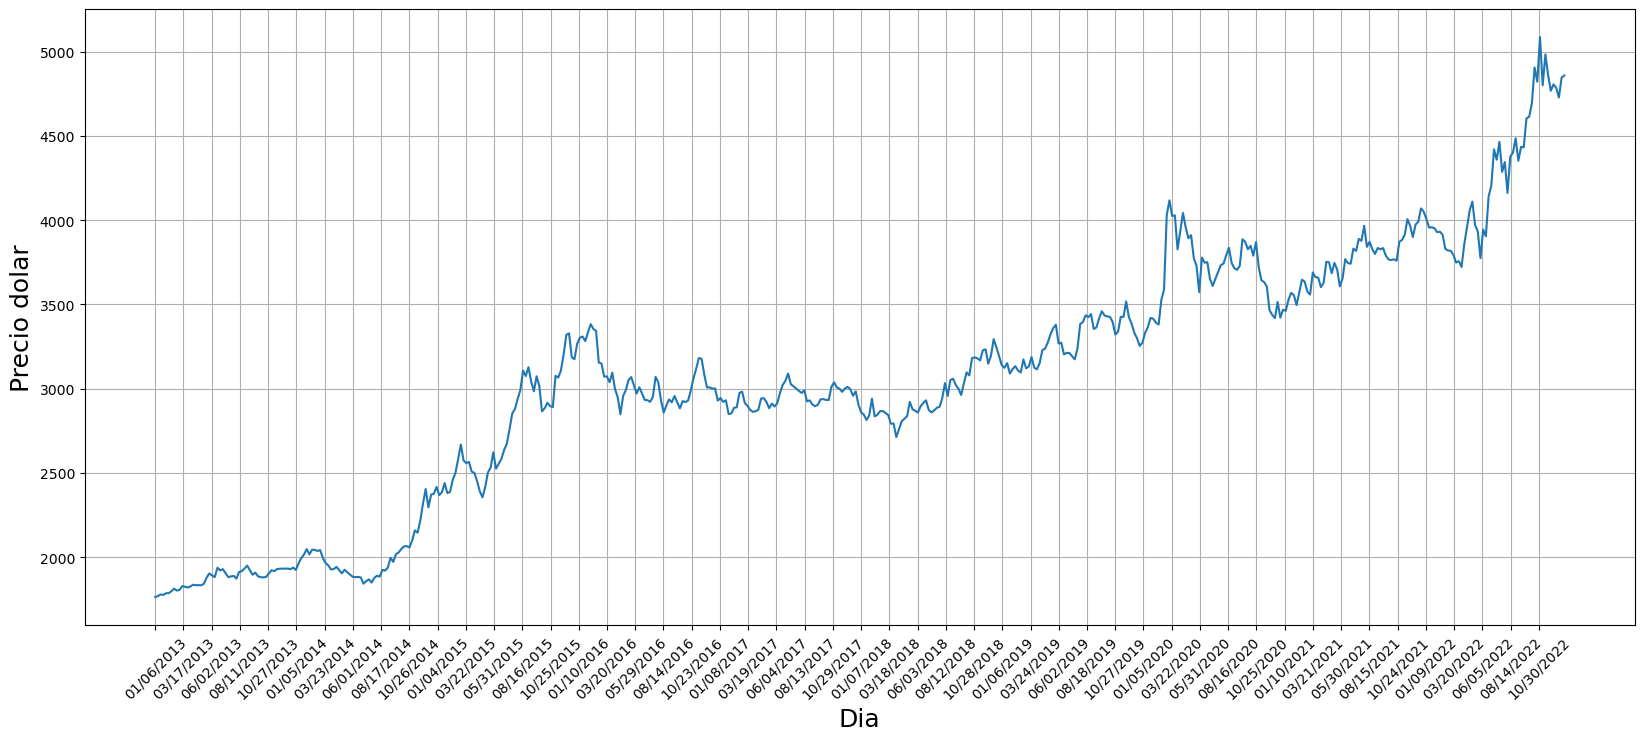

In [57]:
plt.figure(figsize=(20,8))
plt.plot(tiempo[::-1],senal_precio[::-1])
plt.xlabel("Dia",fontsize=18)
plt.ylabel("Precio dolar", fontsize=18)
plt.grid()
plt.tick_params(axis='x',rotation=45)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/50)))
plt.show()

#### la señal muestra que a pasar de los años el precio del dolar presenta cambio en alza y/o inflacion donde su valor en el 2013 era menor a 2000 mientras que en el 2022 sobrepasa las 4500

#### 2.4) Grafica de la señal Cambio

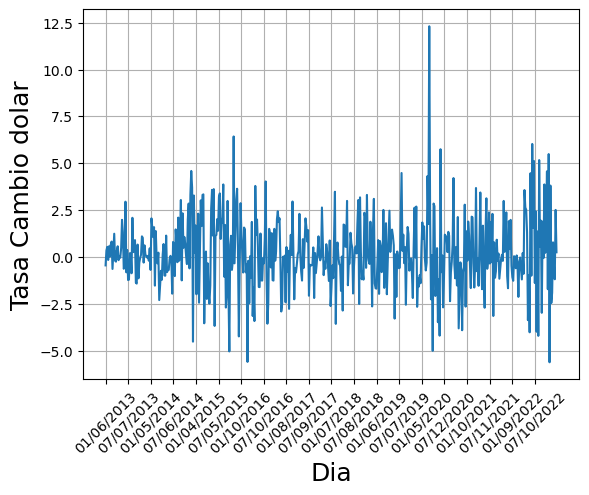

In [46]:
plt.figure()
plt.plot(tiempo[::-1],senal_cambio[::-1])
plt.xlabel("Dia",fontsize=18)
plt.ylabel("Tasa Cambio dolar", fontsize=18)
plt.grid()
plt.tick_params(axis='x',rotation=45)
plt.xticks(list(np.arange(0,len(tiempo),len(tiempo)/20)))
plt.show()

#### en la figura anterior se muesta que la tasa de cambio del dolar desde 2013 hasta el 2022; describe que la mayoria de los valores de la tasa de cambio se mantuvo estable con valores no mayores a 5%, se muestran muy pocos valores atipicos y/o erraticos entre los periodos 2015, 2019-2020 y entre 2021-2022 por lo que se puede decir que la tasa de cambio se ha mantenido constante

#### 2.6) Histograma

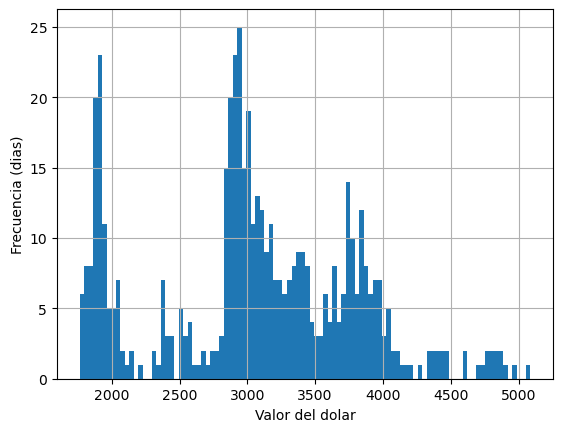

In [48]:
plt.hist(senal_precio,bins=100)
plt.xlabel("Valor del dolar")
plt.ylabel("Frecuencia (dias)")
plt.grid()

In [ ]:
#### se muestra que el valor del dolar durante los 9 años presenta 

#### como puede observarse en la figura anterior con una muestra de mas de 12000 datos existen mas dias donde no se encontro lluvia, es decir, hubo poca precipitacion con valores menores a 5mm,mientras que muy esporadicamente exisitieron dias que sobrepasaran los 10 0 15 mm

### 3.)Filtro de media movil

#### 3.1.a) filtro de media movil con L diferente

Text(0.5, 1.0, 'Filtro orden 70')

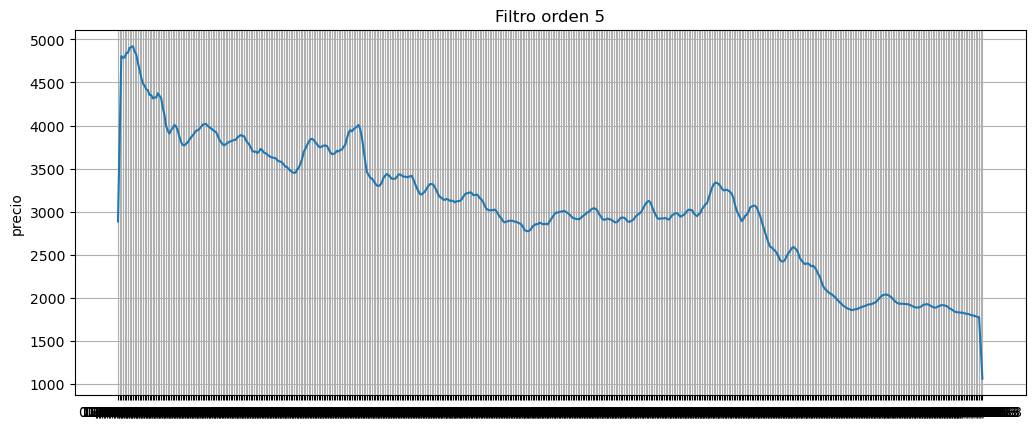

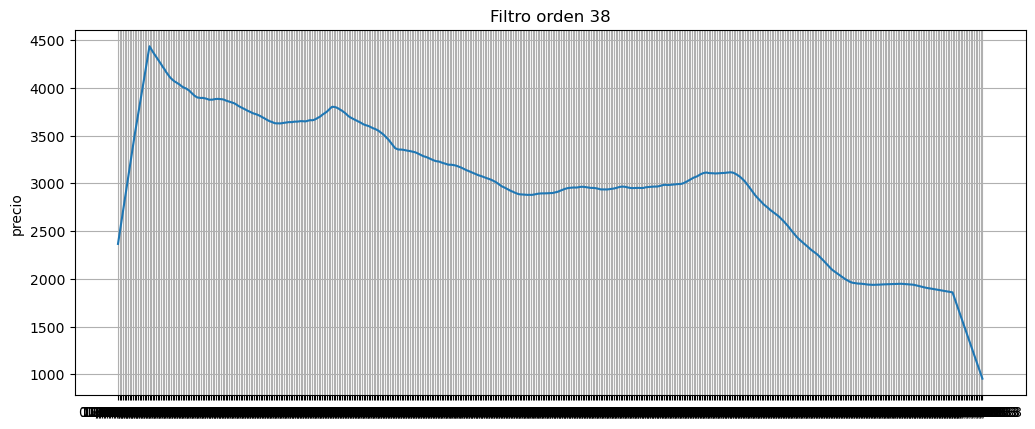

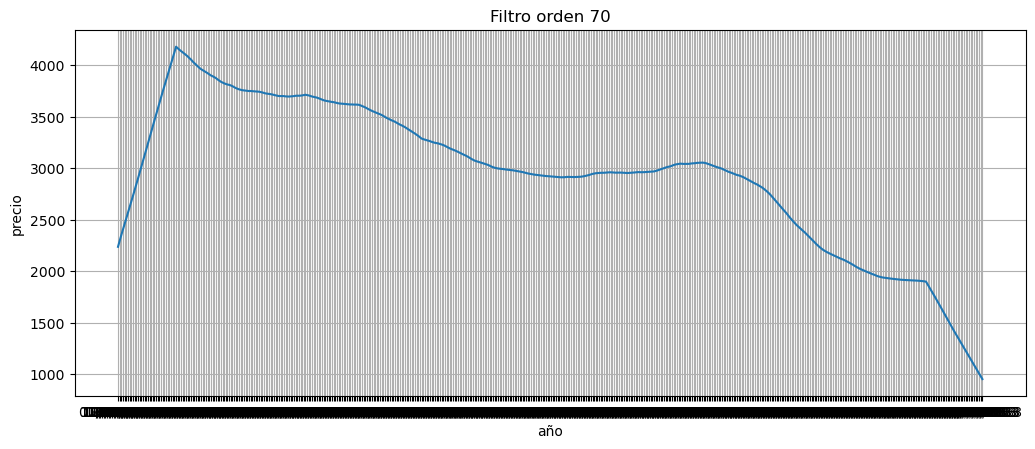

In [59]:
# Para un L= 5
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
L=5
coefs=np.ones(L)/float(L)
senal_smooth=np.convolve(senal_precio, coefs, mode='same')
plt.plot(tiempo,senal_smooth)
plt.tight_layout() #metodo que matiene el correctro espaciado entre las graficas
plt.grid()
plt.ylabel('precio')
plt.title('Filtro orden 5')

#para un L=38
plt.figure(figsize=(20,8))
plt.subplot(2,2,2)
L=38
coefs=np.ones(L)/float(L)
senal_smooth=np.convolve(senal_precio, coefs, mode='same')
plt.plot(tiempo,senal_smooth)
plt.tight_layout() #metodo que matiene el correctro espaciado entre las graficas
plt.grid()
plt.ylabel('precio')
plt.title('Filtro orden 38')

#para un L=70
plt.figure(figsize=(20,8))
plt.subplot(2,2,3)
L=70
coefs=np.ones(L)/float(L)
senal_smooth=np.convolve(senal_precio, coefs, mode='same')
plt.plot(tiempo,senal_smooth)
plt.tight_layout() #metodo que matiene el correctro espaciado entre las graficas
plt.grid()
plt.xlabel('año')
plt.ylabel('precio')
plt.title('Filtro orden 70')


#### * con el orden del filtro menor se encuentra los valores mas precisos y detallados sobre la seña
##### * con el orden del filtro mayor se muestra es el comportamiento general de la señal
##### * Se observa que a medida que se aumenta el valor del orden del filtro (L) la señal se suaviza cada vez mas. por lo que es mas entendible la grafica

##### * El modo "same" recrea la salida sea de la misma dimencion que la entrada, si esto no se declara es nesesario generar un vector tiempo

#### 3.1.b) importe de funcion ztrans

In [63]:
from ztrans import *

#### 3.1.c) funcion impz

##### Con L=6

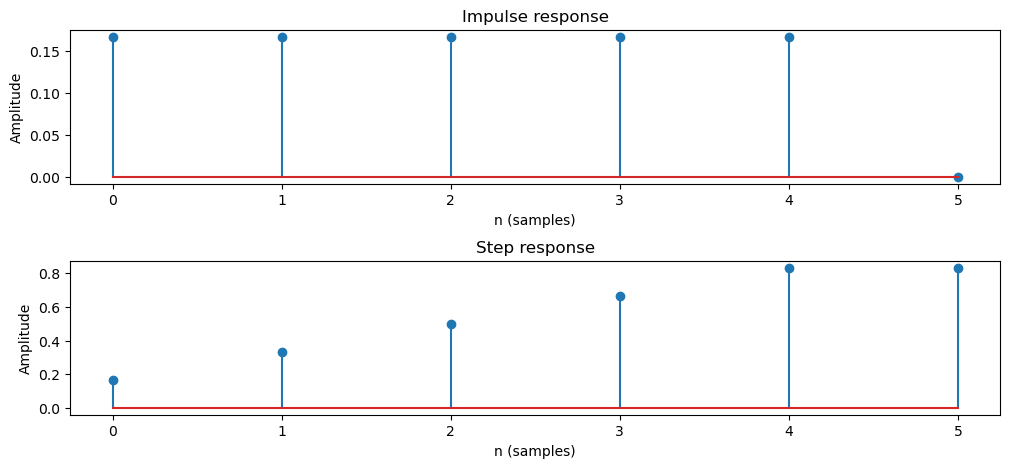

In [61]:
    L=6
    num=np.zeros(L)
    num[0]=1.0/L
    num[-1]=-1.0/L
    den=np.zeros(L) 
    den[0]=1
    den[1]=-1
    impz(num,den)

#### Con L =25

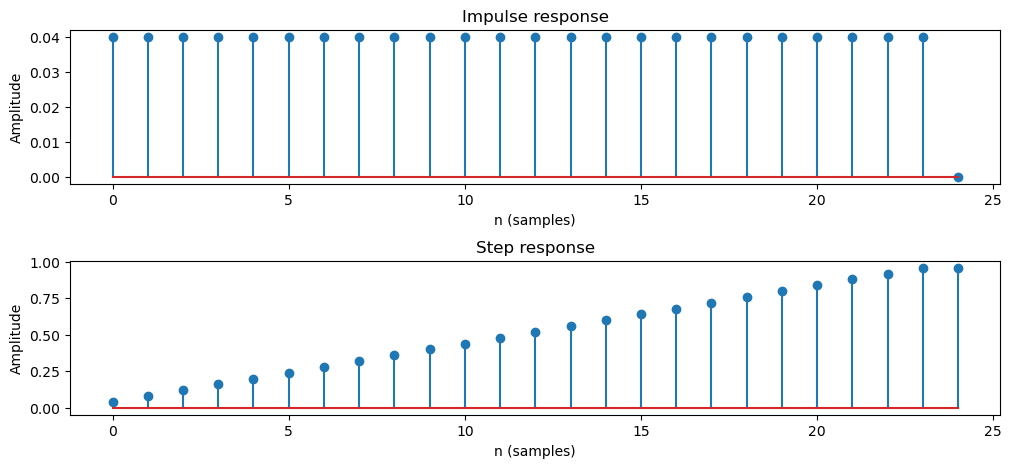

In [62]:
    L=25
    num=np.zeros(L)
    num[0]=1.0/L
    num[-1]=-1.0/L
    den=np.zeros(L) 
    den[0]=1
    den[1]=-1
    impz(num,den)

#### como puede observarse al aumentar el orden del filtro aumenta la frecuencia de corte asociada e igualmente la parte lineal de la respuesta al escalón tarda más en llegar a su maximo punto, lo cual es un resultado esperado pues al tomar mayor cantidad de puntos se filtra mas la señal

#### el comportamiento de ambas señales corresponde a un filtro de pasa bajas

#### 3.1.d) funcion mfreqz

##### Con L=6

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\signal\_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


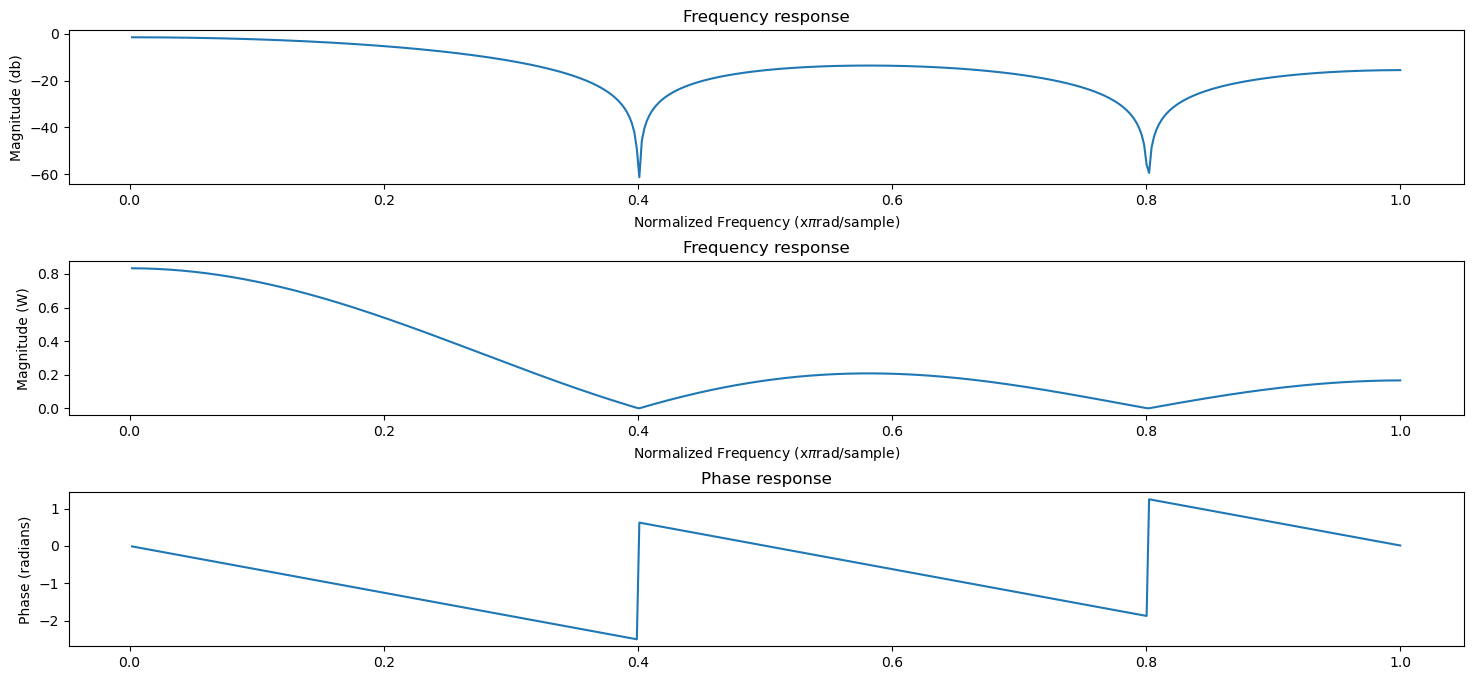

In [64]:
L=6
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
mfreqz(num,den)

##### Con L=25

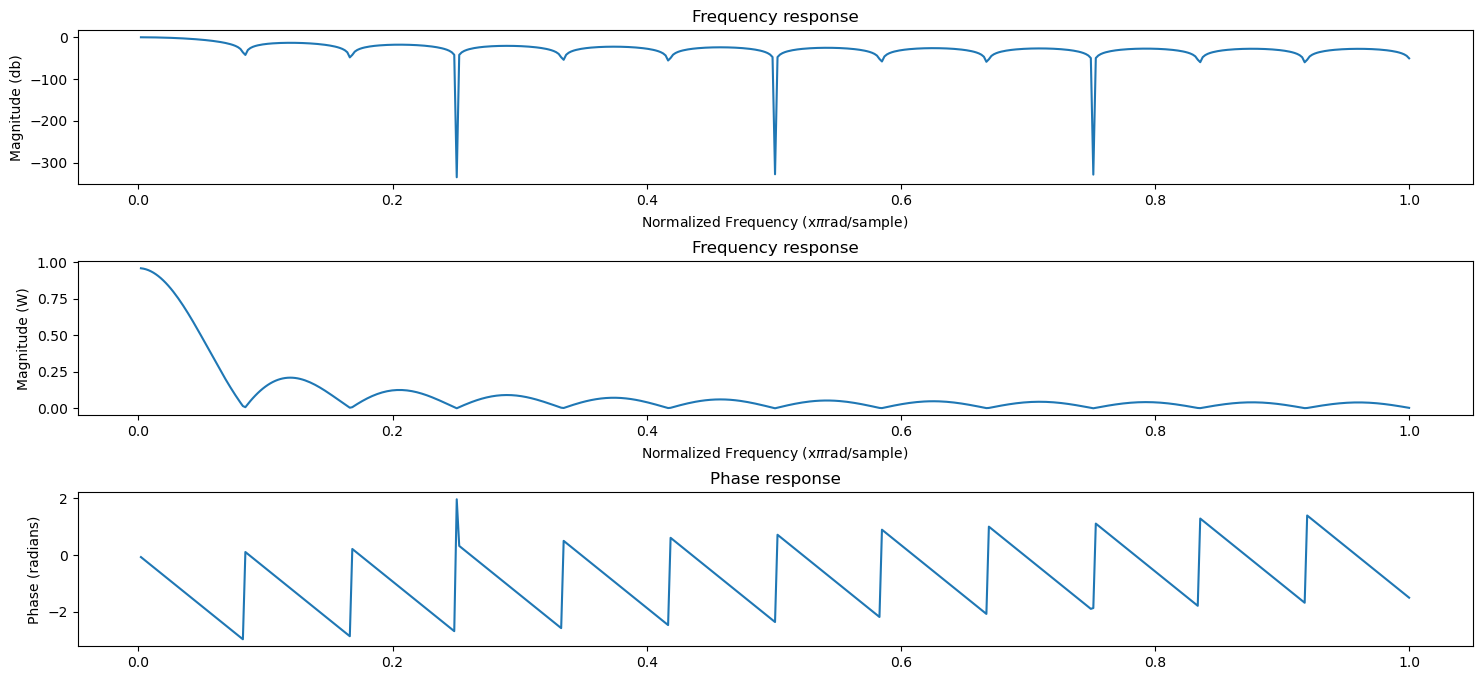

In [65]:
L=25
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
mfreqz(num,den)


#### * Comportamiento de un filtro pasa bajas

#### * tiene un comportamiento parecido al de una senoidal normalizada o como es conocida "Sa". Se puede evidenciar un lobulo principal y varios lobulos secundarios los cuales aumentan segun aumenta el L

#### * al aumentar el filtro la frecuencia de corte es menor

## 4) Filtro de primera diferencia
#### 4.a) derivada de la señal con el filtro de primera diferencia utilizando convolucion 

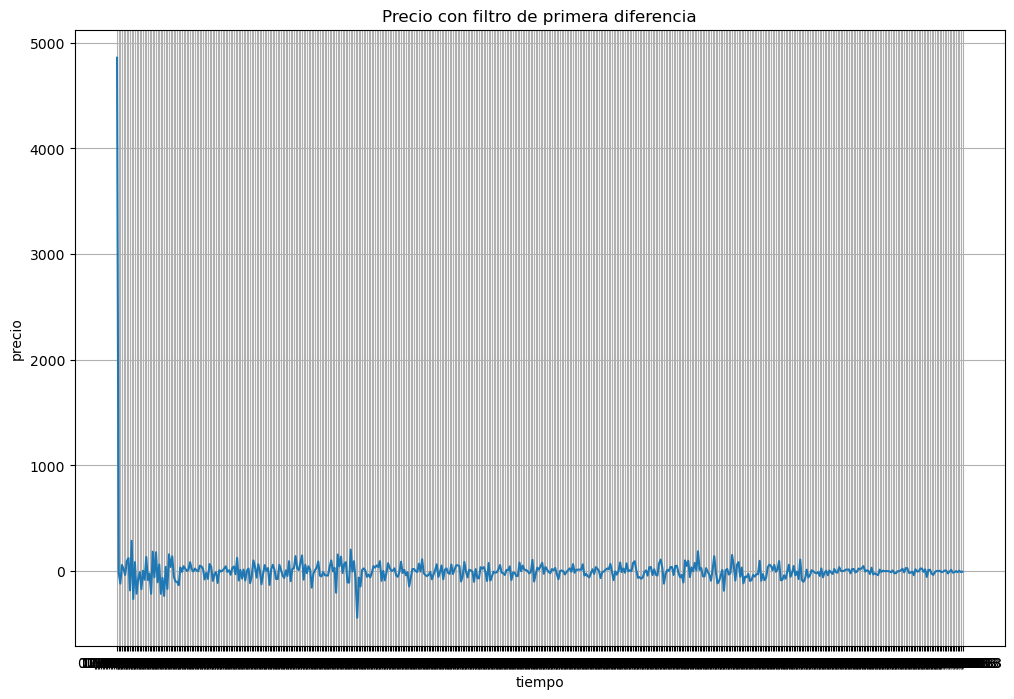

In [73]:
difcoefs=[1, -1]
num=[1, -1] 
den=[1, 0]

senal_c=np.convolve(senal_precio,difcoefs,mode='same')

plt.figure(figsize=(12,))
plt.plot(tiempo,senal_c)
plt.xlabel('tiempo')
plt.ylabel('precio')
plt.title("Precio con filtro de primera diferencia")
plt.grid()
plt.show()

#### * Al aplicar el filtro de primera diferencia, va a indicar los cambios que hay en la grafica, por lo que ayuda a identificar los cambios abruptos en el precio del dolar.*

#### 4.b) respuesta al impulso y escalon del filtro de primera diferencia

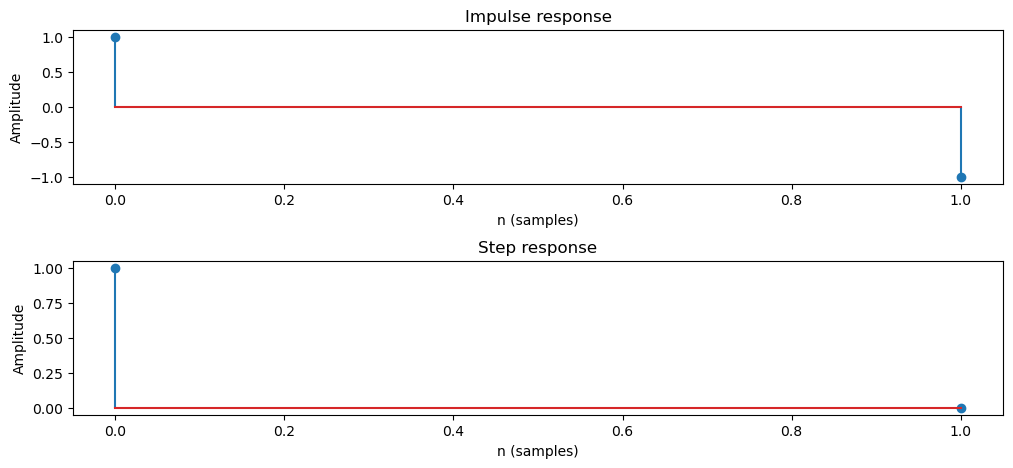

In [75]:
from ztrans import *
difcoefs=[1, -1]
num=[1, -1]
den=[1, 0]
impz(num,den)

#### * se conoce que la respuesta al impulso es la respuesta natural del sistema, se muestra que este sistema responde con dos muestras contrarias
#### * la respuesta al escalon es cuando de forma constante se excita el sistema, la salida de este es un pico de 1 en el inicio 
#### * La respuesta al impulso son dos picos de amplitud 1 y -1 en n=0 y n=1 respectivamente
#### * la respuesta al escalon un pico de amplitud 1.  

#### 4.c) respuesta en frecuencia del filtro de primera diferencia

C:\Users\Usuario\Desktop\Udea 2024-1\Laboratorio PDS\Lab4_PDS_ChaparroCastellanos_JuanCamilo\ztrans.py:9: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * log10 (abs(h))


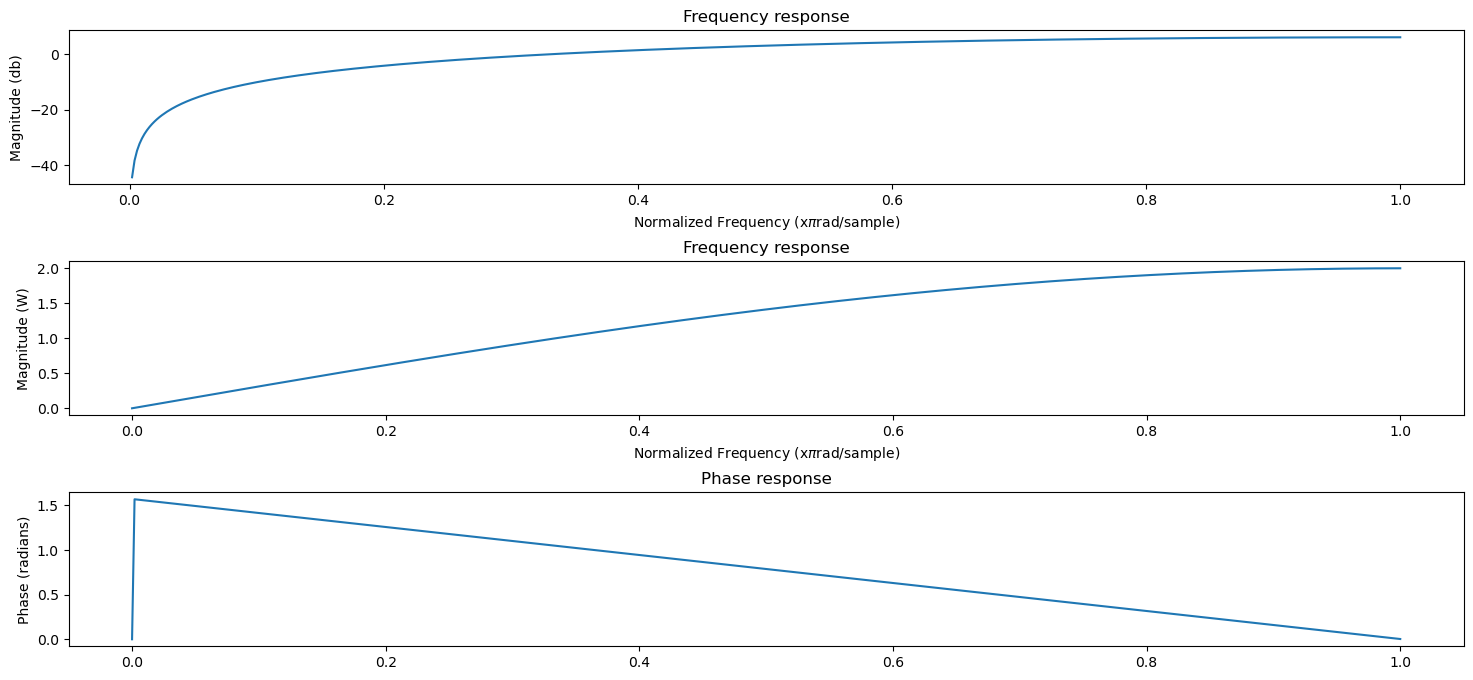

In [76]:
from ztrans import *
difcoefs=[1, -1]
num=[1, -1]
den=[1, 0]
mfreqz(num,den)

#### * como puede observarse el filtro se comporta como un filtro pasa-altas, tiene una frecuencia de corte entre 0 y 0.4.
#### * la funcion de la fase es lineal con pendiente negativa, es decir a mayor frencuencia es menor su valor

## 5. Conclusiones

#### * filtro media movil se comporta como un filtro pasa bajas ya que es una media entre sus muestras,  que ayuda a eliminar picos no deseados dependiendo del orden del filtro que se implemente, el resultado es una señal mas suavizada


#### * filtro de primera diferencia se comporta como un filtro pasa altas,este filtro interpreta la derivada de la señal por lo que se puede observar el comportamiento del sistema
